# Exercise: NEISS, Soma's Question Set

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **neiss2017.tsv**: injury data (one injury per row)
- **2018-NEISS-CPSC-only-CodingManual.pdf**: column definitions and explanations
- **2017 NEISS Data Highlights.pdf**: a partial summary of the data
- **2018ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading in files
    - Reading tab-separated files
    - Reading in N/A values
    - Only reading in some of the data
- Replacing values
- Using strings
    - Searching for strings
    - Comparing to a list of strings
    - Regular expressions
- Using numpy/`np.nan`
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

In [1]:
import pandas as pd

In [2]:
# Use a tab as what's separating the values
df = pd.read_csv("neiss2017.tsv", sep="\t", encoding="latin-1")
df.head()

/Users/jonathansoma/.pyenv/versions/3.6.4/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,1,1.0,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55,2,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,2,1.0,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [3]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                   int64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [4]:
df.Body_Part.value_counts().head()

75.0    63798
76.0    32879
92.0    32104
79.0    32050
31.0    21470
Name: Body_Part, dtype: int64

# Replacing data with other values

You use `df.colname.replace`, and either give it the original and the replacement or a dictionary. You probably want to include `inplace=True` so that it updates the dataframe.

In [5]:
df.Body_Part.replace(75, "Head")

0         Head
1           31
2           33
3         Head
4           79
5           31
6           79
7         Head
8           82
9           79
10          33
11          35
12          36
13          79
14          35
15        Head
16          34
17          37
18          93
19          82
20          30
21          92
22          79
23          32
24          87
25          77
26          34
27          37
28          30
29          87
          ... 
386877      31
386878      79
386879      35
386880      81
386881      31
386882      35
386883      35
386884    Head
386885      83
386886      37
386887      79
386888      85
386889    Head
386890    Head
386891    Head
386892      85
386893      32
386894      85
386895      32
386896      85
386897      32
386898      83
386899      32
386900      81
386901       0
386902      85
386903      92
386904      81
386905    Head
386906      85
Name: Body_Part, Length: 386907, dtype: object

In [6]:
df.Body_Part.replace(94, "Ear")

0         75
1         31
2         33
3         75
4         79
5         31
6         79
7         75
8         82
9         79
10        33
11        35
12        36
13        79
14        35
15        75
16        34
17        37
18        93
19        82
20        30
21        92
22        79
23        32
24        87
25        77
26        34
27        37
28        30
29        87
          ..
386877    31
386878    79
386879    35
386880    81
386881    31
386882    35
386883    35
386884    75
386885    83
386886    37
386887    79
386888    85
386889    75
386890    75
386891    75
386892    85
386893    32
386894    85
386895    32
386896    85
386897    32
386898    83
386899    32
386900    81
386901     0
386902    85
386903    92
386904    81
386905    75
386906    85
Name: Body_Part, Length: 386907, dtype: object

In [7]:
# inplace=True will almost always edit our original dataframe
df.Body_Part.replace(75, "Head", inplace=True)

In [8]:
df.Body_Part.value_counts().head()

Head    63798
76.0    32879
92.0    32104
79.0    32050
31.0    21470
Name: Body_Part, dtype: int64

In [9]:
df.Body_Part.replace(76, "Face", inplace=True)

In [10]:
df.Body_Part.value_counts()

Head    63798
Face    32879
92.0    32104
79.0    32050
31.0    21470
37.0    21469
35.0    20289
82.0    17688
83.0    16903
30.0    15002
36.0    14149
33.0    13805
34.0    13060
85.0    10078
32.0     9484
88.0     8024
93.0     7769
89.0     6584
94.0     5347
77.0     5252
81.0     4951
80.0     4619
0.0      4171
87.0     3868
38.0     2076
84.0       17
Name: Body_Part, dtype: int64

In [11]:
# key is original code
# value is replacement
df.Body_Part.replace({
    94: "Ear",
    77: "Eyeball",
    88: "Mouth",
    89: "Neck",
    30: "Shoulder",
    31: "Upper trunk"
}, inplace=True)

In [12]:
df.Body_Part.value_counts()

Head           63798
Face           32879
92.0           32104
79.0           32050
Upper trunk    21470
37.0           21469
35.0           20289
82.0           17688
83.0           16903
Shoulder       15002
36.0           14149
33.0           13805
34.0           13060
85.0           10078
32.0            9484
Mouth           8024
93.0            7769
Neck            6584
Ear             5347
Eyeball         5252
81.0            4951
80.0            4619
0.0             4171
87.0            3868
38.0            2076
84.0              17
Name: Body_Part, dtype: int64

In [13]:
df[df.Sex == 8]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Finding columns with missing data

In [14]:
df[df.Treatment_Date == 'NaN']

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight


In [15]:
# .isnull() is what you feel like should be == "NaN"
df[df.Treatment_Date.isnull()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Want the opposite? You can do this!
# df[df.Treatment_Date.notnull()]

# Dropping rows with missing data

`dropna` takes `subset=`, which tells pandas which columns to pay attention to.

In [17]:
# Drop all rows where "Treatment_Date" is missing data
df.dropna(subset=['Treatment_Date'], inplace=True)

In [18]:
df[df.Treatment_Date.isnull()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight


In [19]:
df.Race.value_counts()

1.0    160527
0.0    143677
2.0     55144
3.0     21193
4.0      4714
5.0      1234
6.0       417
Name: Race, dtype: int64

In [20]:
df[df.Race != 0].Race.value_counts()

1.0    160527
2.0     55144
3.0     21193
4.0      4714
5.0      1234
6.0       417
Name: Race, dtype: int64

# How to replace data with `NaN`/missing data

In this case, we are replacing every `0` with `NaN` (missing data)

In [21]:
import numpy as np
df.Race.replace(0, np.nan, inplace=True)

In [22]:
df.Race.value_counts()

1.0    160527
2.0     55144
3.0     21193
4.0      4714
5.0      1234
6.0       417
Name: Race, dtype: int64

In [23]:
df.Race.value_counts(dropna=False)

 1.0    160527
NaN     143677
 2.0     55144
 3.0     21193
 4.0      4714
 5.0      1234
 6.0       417
Name: Race, dtype: int64

## Searching for strings??

In [24]:
df.Body_Part.replace(79, "Lower trunk", inplace=True)

In [25]:
df.head(3)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1,1.0,NaN,Head,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1,1.0,NaN,Upper trunk,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,1,1.0,NaN,33,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641


In [26]:
# Does the string of the "Body Part" column
# contain the text 'trunk'
df.Body_Part.str.contains("trunk")

0         False
1          True
2           NaN
3         False
4          True
5          True
6          True
7         False
8           NaN
9          True
10          NaN
11          NaN
12          NaN
13         True
14          NaN
15        False
16          NaN
17          NaN
18          NaN
19          NaN
20        False
21          NaN
22         True
23          NaN
24          NaN
25        False
26          NaN
27          NaN
28        False
29          NaN
          ...  
386877     True
386878     True
386879      NaN
386880      NaN
386881     True
386882      NaN
386883      NaN
386884    False
386885      NaN
386886      NaN
386887     True
386888      NaN
386889    False
386890    False
386891    False
386892      NaN
386893      NaN
386894      NaN
386895      NaN
386896      NaN
386897      NaN
386898      NaN
386899      NaN
386900      NaN
386901      NaN
386902      NaN
386903      NaN
386904      NaN
386905    False
386906      NaN
Name: Body_Part, Length:

In [27]:
df[df.Body_Part.str.contains("trunk")]

ValueError: cannot index with vector containing NA / NaN values

In [ ]:
# Same as above, but count missing values as False
df[df.Body_Part.str.contains("trunk", na=False)]

In [ ]:
# __WALL___PUNCH___ - 
# ___MUL______RAC___ - 

# Fill in the blanks with `.str.contains`

## This is going to use regular expressions

`.*` means "fill in the blanks"

In [ ]:
df[df.Narrative_1.str.contains("FELL.*STAIRS", na=False)]

In [ ]:
df[df.Narrative_1.str.contains("FELL.*STAIRS", na=False) | df.Narrative_1.str.contains("FALL.*STAIRS", na=False)].head(2)

## If you want to do 'not' in pandas for `.str.contains`

In [ ]:
~df.Narrative_1.str.contains("WALL")

# `.replace` vs `.str.replace`: EVERYTHING IS MISERABLE

**`.replace`** is for ENTIRE CELL VALUES

```python
df.Body_Part.replace(75,"Eyeball")
```

**`.str.replace`** is used for matching PART OF A STRING

"555 8th St, NY"
"555 8th St, New York"

```python
df['address'] df.address.str.replace("NY", "New York")
```


In [ ]:
df['Other_Race'] = df.Other_Race.str.replace('.*MUL.*RAC.*','MULTIRACIAL')
df.Other_Race.value_counts()

In [ ]:
df.Other_Race.replace(".*MUL.*RAC.*","MULTIRACIAL", regex=True, inplace=True)
df.Other_Race.value_counts()

# Convert a column into an integer

In [ ]:
df[df.Age == 'C']

In [ ]:
df.dropna(subset=['Treatment_Date'], inplace=True)

In [ ]:
df[df.Age == 'C']

In [ ]:
df['Age'] = df.Age.astype(int)
df.dtypes

In [ ]:
df[df.Narrative_1.str.contains("PUNCH.*WALL")].Sex.value_counts()

In [ ]:
wall_punchers = df[df.Narrative_1.str.contains("PUNCH.*WALL")]

In [ ]:
wall_punchers.Sex.value_counts(ascending=True).plot(kind='barh')

In [ ]:
wall_punch = df[df.Narrative_1.str.contains("PUNCH.*WALL")]
wall_punch.head()

In [ ]:
wall_punch['Age'] = wall_punch.Age.astype(int)

In [ ]:
wall_punch.dtypes

In [ ]:
wall_punch.Age.hist()

In [ ]:
df.Age.median() 

In [ ]:
df.Age.mean() 

In [ ]:
df.Narrative_1.median()

In [ ]:
df.Narrative_1.mean()

In [ ]:
df.Age.dtype

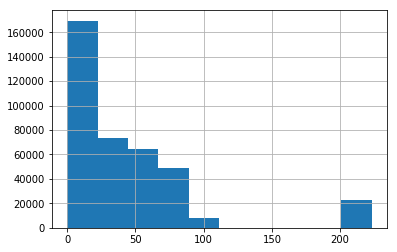

In [29]:
df.Age.astype(int).hist()